In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
#from brokenaxes import brokenaxes
from matplotlib import gridspec


(2970, 27447)
4149


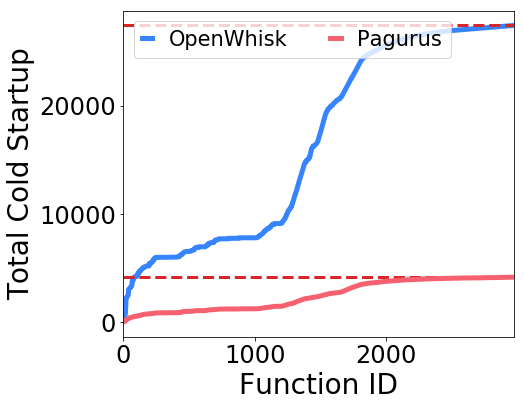

In [8]:
fig, ax1 = plt.subplots()
ax1.set_xlim(0, 2970)
fig.set_size_inches(7,6)
plt.rcParams.update({'font.size': 24})

res = pd.read_csv('expected_result/cold_num.csv')
#res = pd.read_csv('/content/cold_start.csv')
y2 = res["openwhisk_cold"].values
for i in range(1, len(y2)):
  y2[i] += y2[i - 1]
print(len(y2), y2[len(y2) - 1])
x2 = np.arange(0,len(y2))
plt.plot(x2,y2,label='OpenWhisk',color="#3685fe",linewidth=5)

ax1.axhline(y=27447,  color='tab:red', linestyle='--', linewidth=3)
ax1.axhline(y=4149, color='tab:red', linestyle='--', linewidth=3)

y1 = res["pagurus_cold"].values
for i in range(1, len(y1)):
  y1[i] += y1[i - 1]
print(y1[len(y1) - 1])
x1 = np.arange(0,len(y1))
plt.plot(x1,y1,label='Pagurus',color="#f5616f",linewidth=5)

plt.ylabel('Total Cold Startup',fontsize = 28)
plt.xlabel('Function ID', fontsize=28)

#ax1.axhline(y=0.7, xmin=0.0, xmax=0.14, color='tab:red', linestyle='--', linewidth=3)

plt.legend(fontsize=21, loc="upper left",ncol=2,handlelength=0.5)
# fig.savefig("../figures/cold_new_1.pdf",bbox_inches='tight')
plt.show()

2970


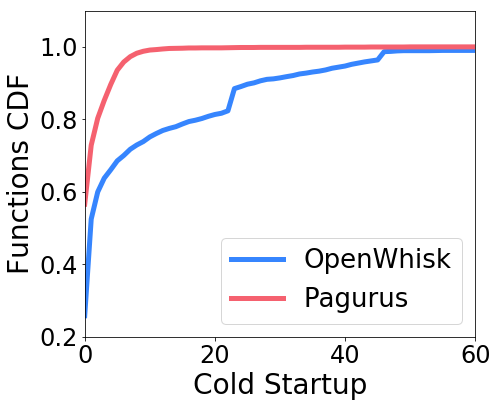

In [7]:
fig, ax1 = plt.subplots()
ax1.set_xlim(0, 60)
fig.set_size_inches(7,6)
plt.rcParams.update({'font.size': 24})

res = pd.read_csv('expected_result/cold_frequency.csv')
#res = pd.read_csv('/content/alleviation.csv')
total_function = len(res)
print(total_function)

y1 = res["pagurus_cold"].values
y2 = res["openwhisk_cold"].values
max2 = 0
for i in range(len(y2)):
    max2 = max(max2, y2[i])
max1 = 0
for i in range(len(y1)):
    max1 = max(max1, y1[i])
max_cold = max(max1, max2) + 5

cnt2 = np.zeros(max_cold)
for i in range(len(y2)):
    cnt2[y2[i]] = cnt2[y2[i]] + 1
for i in range(1, max_cold):
    cnt2[i] = cnt2[i] + cnt2[i-1]
for i in range(max_cold):
    cnt2[i] /= total_function

ax1.axhline(y=27447,  color='tab:red', linestyle='--', linewidth=3)
ax1.axhline(y=4149, color='tab:red', linestyle='--', linewidth=3)

cnt1 = np.zeros(max_cold)
for i in range(len(y1)):
    cnt1[y1[i]] = cnt1[y1[i]] + 1
for i in range(1, max_cold):
    cnt1[i] = cnt1[i] + cnt1[i-1]
for i in range(max_cold):
    cnt1[i] /= total_function

x=np.arange(max_cold)
plt.plot(x,cnt2,label='OpenWhisk',color="#3685fe",linewidth=5)
plt.plot(x,cnt1,label='Pagurus',color="#f5616f",linewidth=5)

plt.ylabel('Functions CDF',fontsize = 28)
plt.xlabel('Cold Startup', fontsize=28)

#ax1.axhline(y=0.7, xmin=0.0, xmax=0.14, color='tab:red', linestyle='--', linewidth=3)

ax1.set_ylim(0.2,1.1)
plt.legend(fontsize=26, loc="lower right")
# fig.savefig("../figures/cold_new_2.pdf",bbox_inches='tight')
plt.show()

2970
2970


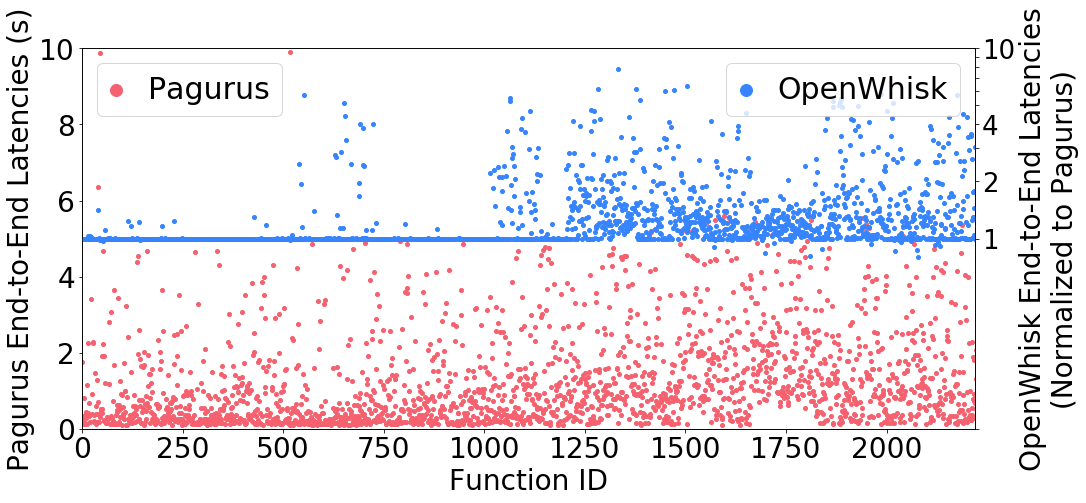

In [5]:
plt.rcParams.update({'font.size': 28})
fig, ax1 = plt.subplots()
ax1.set_xlim(0, 2219)
fig.set_size_inches(16, 7)


res = pd.read_csv('expected_result/latency_95.csv')

y1 = res["pagurus_exe"].values
print(len(y1))
x1 = np.arange(0,len(y1))
ax1.set_ylabel("Pagurus End-to-End Latencies (s)")
ax1.tick_params(axis='y')
ax1.set_xlim(0, 2219)
# ax1.set_yticklabels([0, "10^0", "10^1"])
ax1.scatter(x1,y1,label='Pagurus',color="#f5616f",s=16)
# plt.yticks([0, 1, 2],[0, "10^0", "10^1"])

y2 = res["percent"].values
print(len(y2))
for index in range(len(y2)):
    y2[index] = np.log10(y2[index])+1
x2 = np.arange(0,len(y2))
ax2 = ax1.twinx()
ax2.set_ylim(0.001, 2)
ax2.set_ylabel("OpenWhisk End-to-End Latencies\n (Normalized to Pagurus) ")
plt.yticks([0, 1, 1.3 , 1.477, 1.6, 1.7, 1.778, 1.845, 1.903, 1.954, 2], ["", 1, 2, "", 4, "", "", "", "", "", 10],fontsize=26)
ax2.scatter(x2,y2,label='OpenWhisk',color="#3685fe",s=16)
# plt.ylabel('Pagurus',fontsize = 28)
ax1.set_xlabel('Function ID', fontsize=28)

ax1.set_ylim(0.001, 10.0)
ax1.legend(fontsize=30, loc="upper left", handlelength = 0.5,  markerscale = 3)
ax2.legend(fontsize=30, loc="upper right", handlelength = 0.5,  markerscale = 3)
# fig.savefig("../figures/overhead_1.pdf",bbox_inches='tight')
plt.show()